## BGG Game Data EDA

### Imports

In [77]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

from IPython.display import display, Markdown

### Functions

In [79]:
# Function to show the dimensions, column zero counts, column datatypes, column null counts, and the first and last 5 rows of the input dataframe
def check_df(df):
    # Display the dimensions of the DataFrame
    display(Markdown("#### DataFrame dimensions"))
    display(df.shape)

    # Add a new line
    display(Markdown("<br>"))

    # Display data types of all columns
    display(Markdown("#### Data Types, zeros and nulls"))
    display(pd.DataFrame({
        "Data type": df.dtypes,
        "Zero counts": (df == 0).sum(),
        "Zero count %": (((df == 0).sum()/df.count())* 100).round(2),
        "Null counts": df.isnull().sum(),
        "Null count %": ((df.isnull().sum())/(df.count()+df.isnull().sum())* 100).round(2)
    }))

# Function to return a dataframe with rows filtered by a specified word in a specified column:
def df_keyword_search(df, column, word):
    # Ensure the column is treated as strings and handle NaN values by replacing them with empty strings
    column_data = df[column].fillna('').astype(str)
    
    # Filter the DataFrame based on the presence of the word in the specified column, case insensitive
    keyword_df = df.loc[column_data.str.contains(rf'\b{word}\b', case=False, regex=True)]
    
    return keyword_df

# Function to count the different words
def count_words(df, column):
    # Ensure the column is treated as strings, handling NaN values
    column = df[column].fillna('').astype(str)
    
    # Concatenate all values in the column into a single string with '//' as a separator
    all_words_sep = column.str.cat(sep='//')
    
    # Split the single string into words based on the separator
    all_words = all_words_sep.split('//')
    
    # Convert the list of words into a pandas Series
    words_series = pd.Series(all_words)
    
    # Count occurrences of each word and return the result
    word_counts = words_series.value_counts()

    # Convert the Series to a DataFrame with words and their counts
    word_counts_df = word_counts.reset_index()
    word_counts_df.columns = ['Word', 'Count']

    # Calculate the percentage of total counts
    total_count = word_counts_df['Count'].sum()
    word_counts_df['Percentage'] = round((word_counts_df['Count'] / total_count) * 100,2)
    
    return word_counts_df

### Loading in saved dataframe

In [81]:
# Creating dataframe from Games_filtered.csv data
filtered_df = pd.read_csv('Games_filtered.csv')

### Data overview

In [83]:
# Checking contents of filtered_df
check_df(filtered_df)

#### DataFrame dimensions

(4981, 19)

<br>

#### Data Types, zeros and nulls

,Data type,Zero counts,Zero count %,Null counts,Null count %
id,int64,0,0.00,0,0.00
name,object,0,0.00,0,0.00
average,float64,0,0.00,0,0.00
usersrated,int64,0,0.00,0,0.00
number of comments,int64,0,0.00,0,0.00
complexity votes,int64,4,0.08,0,0.00
average complexity,float64,4,0.08,0,0.00
year published,int64,6,0.12,0,0.00
min player number,int64,4,0.08,0,0.00
max player number,int64,8,0.16,0,0.00


### Complexity votes & average

In [87]:
# Checking the top and lower 5 games in the filtered_df ordered by highest complexity
display(filtered_df.sort_values(by = 'average complexity', ascending = False).head(5))
display(filtered_df.sort_values(by = 'average complexity', ascending = False).tail(5))

,id,name,average,usersrated,number of comments,complexity votes,average complexity,year published,min player number,max player number,min play time,max play time,expected play time,minimum age limit,category,mechanism,game designer,publisher,url
4840,255484,World in Flames Collector's Edition Deluxe,8.98667,123,45,14,4.8571,2017,2,6,120,4800,4800,12,World War II // Wargame,Dice Rolling // Hexagon Grid // Area Movement,Greg Pinder // Harry Rowland,Australian Design Group,https://boardgamegeek.com/xmlapi2/thing?id=255484&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3039,7614,A World at War: Second World War in Europe and the Pacific,7.61204,378,240,117,4.8547,2003,1,6,1440,2880,2880,14,World War II // Wargame,Hexagon Grid,Bruce Harper,GMT Games,https://boardgamegeek.com/xmlapi2/thing?id=7614&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
4970,370448,Europa Universalis: The Price of Power (Deluxe Edition),8.93955,156,64,24,4.8333,2023,1,6,90,300,300,14,Economic // Pike and Shot // Video Game Theme // Political // Age of Reason // Wargame // Napoleonic // Renaissance // Negotiation // Civilization // Exploration,Campaign / Battle Card Driven // Hand Management // Action Points // Area Movement // Scenario / Mission / Campaign Game // Area Majority / Influence // Dice Rolling,Eivind Vetlesen,Aegir Games // NAC Wargames // Ediciones MasQueOca,https://boardgamegeek.com/xmlapi2/thing?id=370448&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3520,332402,Vietnam: 1965-1975 (2nd edition),8.73176,131,63,11,4.8182,2022,2,2,120,6000,6000,12,Vietnam War // Wargame,Simulation,Nick Karp,GMT Games,https://boardgamegeek.com/xmlapi2/thing?id=332402&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
787,281655,High Frontier 4 All,8.41781,1761,566,385,4.8182,2020,1,5,30,240,240,14,Economic // Industry / Manufacturing // Space Exploration // Civilization // Exploration // Science Fiction,"Variable Player Powers // Network and Route Building // Hand Management // Pick-up and Deliver // Resource to Move // Deck, Bag, and Pool Building // Simulation // Point to Point Movement // Negotiation // Auction/Bidding",Dom Rougier // Jon Manker // Phil Eklund // Justin Grey,Ion Game Design // Mosaico Jogos // Sierra Madre Games // Fox in the Box // 500 Nuances de Geek // Ediciones MasQueOca // Banana Games,https://boardgamegeek.com/xmlapi2/thing?id=281655&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1


,id,name,average,usersrated,number of comments,complexity votes,average complexity,year published,min player number,max player number,min play time,max play time,expected play time,minimum age limit,category,mechanism,game designer,publisher,url
3043,261614,Unanimo Party,7.14068,348,43,7,1.0,2018,3,12,30,30,30,10,Party Game,Paper-and-Pencil,Theora Design,Happy Baobab // Brain Picnic // Cocktail Games // Zacatrus,https://boardgamegeek.com/xmlapi2/thing?id=261614&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
4049,327913,Unlock!: Timeless Adventures – Arsène Lupin und der große weiße Diamant,7.47189,122,21,0,0.0,2019,1,6,60,60,60,10,Novel-based // Real-time // Card Game // Exploration // Puzzle,Storytelling // Cooperative Game,Aristide Bruyant,Space Cowboys,https://boardgamegeek.com/xmlapi2/thing?id=327913&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3805,331953,Unlock!: Timeless Adventures – Verloren im Zeitstrudel!,7.92569,116,21,0,0.0,2019,1,6,45,60,60,0,Card Game // Real-time // Exploration // Puzzle,Storytelling // Cooperative Game,Guillaume Montiage,Space Cowboys,https://boardgamegeek.com/xmlapi2/thing?id=331953&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
4483,202096,Marvel Dice Masters: Iron Man and War Machine Starter Set,7.28144,113,23,0,0.0,2017,2,2,15,60,60,14,Fighting // Dice // Comic Book / Strip // Collectible Components,"Dice Rolling // Deck, Bag, and Pool Building // Variable Player Powers",Eric M. Lang // Mike Elliott,WizKids (I),https://boardgamegeek.com/xmlapi2/thing?id=202096&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
4944,347747,Mythic Mischief: Headmaster's Box,8.05548,146,45,0,0.0,2022,1,4,15,90,90,14,Fantasy // Abstract Strategy // Miniatures,Action Points // Variable Player Powers // Grid Movement,Austin Harrison // Max Anderson // Zac Dixon,IV Studio (IV Games),https://boardgamegeek.com/xmlapi2/thing?id=347747&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1


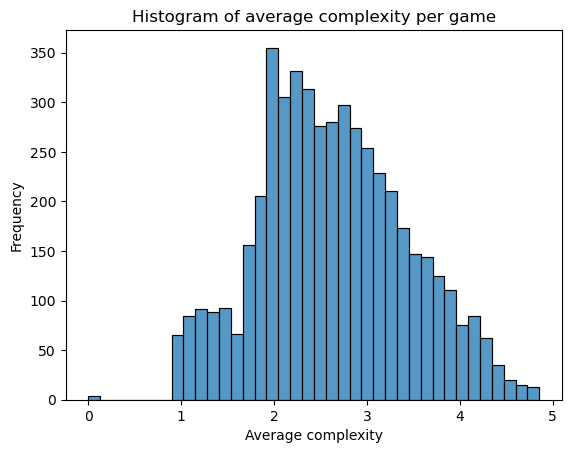

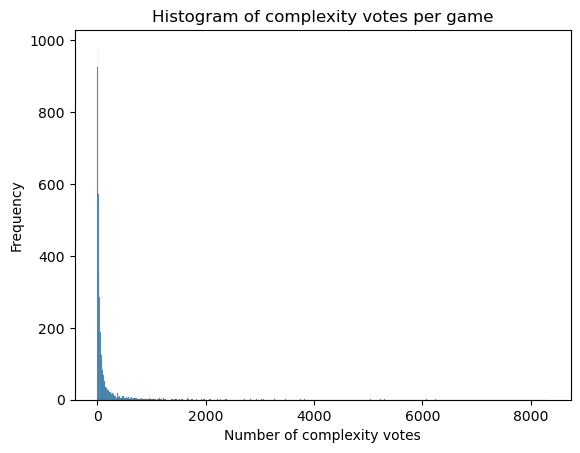

In [88]:
# Viewing the distribution of average complexity per game (between 0 and 5)
sns.histplot(filtered_df['average complexity'])
plt.title('Histogram of average complexity per game')
plt.xlabel("Average complexity")
plt.ylabel("Frequency")
plt.show()

# Viewing the distribution of complexity votes per game
sns.histplot(filtered_df['complexity votes'])
plt.title('Histogram of complexity votes per game')
plt.xlabel("Number of complexity votes")
plt.ylabel("Frequency")
plt.show()

In [89]:
# Sorting the complexity votes from highest to lowest
filtered_df.sort_values(by = 'complexity votes', ascending =False, inplace=True)

# Exploring the number of complexity votes per game number of games with no ratings
print(f"Number of games with no complexity votes given: {filtered_df.loc[(filtered_df['complexity votes'] == 0), 'complexity votes'].count()}")

# Exploring the number of complexity votes per game number of games with less than 10 ratings
print(f"Number of games with less than 10 complexity votes given: {filtered_df.loc[(filtered_df['complexity votes'] < 10), 'complexity votes'].count()}")

# Median complexity votes per game
print(f"Median complexity votes given: {filtered_df.loc[:,'complexity votes'].median()}")

# 95th percentile of complexity votes
complexity_votes_95th = np.percentile(filtered_df.loc[:,'complexity votes'].values, 95)
print(f"95th Percentile of complexity votes: {complexity_votes_95th}")  

# Count of games above 95th percentile of complexity votes
print(f"Count of games above 95th Percentile of complexity votes: {filtered_df.loc[(filtered_df['complexity votes'] >complexity_votes_95th), 'complexity votes'].count()}")  

# Count of games above 95th percentile of complexity votes
print(f"Count of games in and below 95th Percentile of complexity votes: {filtered_df.loc[(filtered_df['complexity votes'] <=complexity_votes_95th), 'complexity votes'].count()}")  


Number of games with no complexity votes given: 4
Number of games with less than 10 complexity votes given: 925
Median complexity votes given: 30.0
95th Percentile of complexity votes: 652.0
Count of games above 95th Percentile of complexity votes: 249
Count of games in and below 95th Percentile of complexity votes: 4732


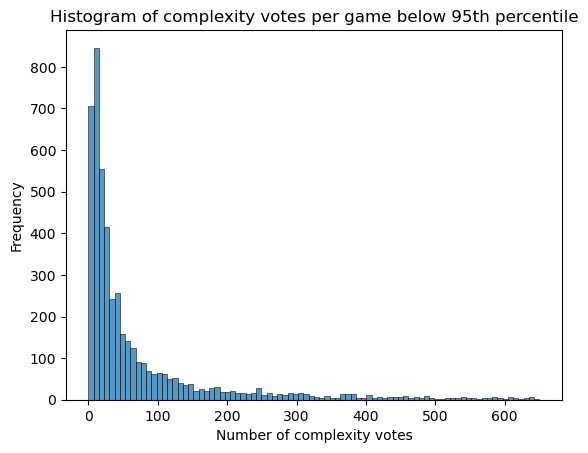

In [90]:
# Viewing the distribution of complexity votes per game below 95th percentile
sns.histplot(filtered_df.loc[filtered_df['complexity votes']<complexity_votes_95th,'complexity votes'])
plt.title('Histogram of complexity votes per game below 95th percentile')
plt.xlabel("Number of complexity votes")
plt.ylabel("Frequency")
plt.show()

In [91]:
# Identifying the games with no complexity average
filtered_df.loc[filtered_df['average complexity']==0,['id','name','complexity votes','average complexity']]

,id,name,complexity votes,average complexity
4944,347747,Mythic Mischief: Headmaster's Box,0,0.0
4483,202096,Marvel Dice Masters: Iron Man and War Machine Starter Set,0,0.0
3805,331953,Unlock!: Timeless Adventures – Verloren im Zeitstrudel!,0,0.0
4049,327913,Unlock!: Timeless Adventures – Arsène Lupin und der große weiße Diamant,0,0.0


### Player numbers

In [93]:
# Checking the top and lower 5 games in the filtered_df ordered by max number of players
display(filtered_df.sort_values(by = 'max player number', ascending = False).head(5))
display(filtered_df.sort_values(by = 'max player number', ascending = False).tail(5))

,id,name,average,usersrated,number of comments,complexity votes,average complexity,year published,min player number,max player number,min play time,max play time,expected play time,minimum age limit,category,mechanism,game designer,publisher,url
3848,60815,Black Powder: Second Edition,7.30653,177,77,15,2.6000,2009,2,120,120,360,360,12,Post-Napoleonic // Miniatures // American Civil War // Age of Reason // Wargame // American Revolutionary War // Napoleonic // Book,Dice Rolling // Simulation,Rick Priestley // Jervis Johnson // John Stallard,Warlord Games,https://boardgamegeek.com/xmlapi2/thing?id=60815&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
147,263918,Cartographers,7.60249,29494,3950,722,1.8767,2019,1,100,30,45,45,10,Fantasy // Territory Building,Simultaneous Action Selection // Grid Coverage // Paper-and-Pencil // End Game Bonuses // Solo / Solitaire Game // Bingo // Square Grid // Variable Set-up,Jordy Adan,Raven Distribution // Kaissa Chess & Games // Buró // Ігромаг // The Wood Games // Pegasus Spiele // Grok Games // Ogry Games // MIPL // Reflexshop // Tower Tactic Games // Hobby World // Mandoo Games // Ludofy Creative // Arclight Games // Gen-X Games // REXhry // Outland // Intrafin Games // Gameland 游戏大陆 // Regatul Jocurilor // Lautapelit.fi // Thunderworks Games,https://boardgamegeek.com/xmlapi2/thing?id=263918&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
2332,388329,Waypoints,7.72039,488,161,15,2.2000,2023,1,100,20,40,40,8,Travel // Exploration // Print & Play,Movement Points // Simultaneous Action Selection // Resource to Move // Paper-and-Pencil // Point to Point Movement // Dice Rolling,Matthew Dunstan // Rory Muldoon,Postmark Games,https://boardgamegeek.com/xmlapi2/thing?id=388329&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
2319,360471,Aquamarine,7.36170,620,230,23,1.7826,2022,1,100,20,30,30,8,Nautical // Exploration // Print & Play,Movement Points // Simultaneous Action Selection // Resource to Move // Paper-and-Pencil // Dice Rolling,Matthew Dunstan // Rory Muldoon,Postmark Games,https://boardgamegeek.com/xmlapi2/thing?id=360471&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
179,233867,Welcome To...,7.53551,30954,4065,600,1.8367,2018,1,100,25,25,25,10,City Building,Simultaneous Action Selection // Paper-and-Pencil // Solo / Solitaire Game // Bingo // Contracts // Pattern Building,Benoit Turpin,Dude Games // Kaissa Chess & Games // Deep Water Games // Gém Klub Kft. // Pegasus Spiele // Jumping Turtle Games // sternenschimmermeer // Engames // Rebel Sp. z o.o. // Broadway Toys LTD // Fever Games // Lord of Boards // Ludofy Creative // SD Games // REXhry // Blue Cocker Games // GateOnGames // Lautapelit.fi // Lifestyle Boardgames Ltd,https://boardgamegeek.com/xmlapi2/thing?id=233867&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1


,id,name,average,usersrated,number of comments,complexity votes,average complexity,year published,min player number,max player number,min play time,max play time,expected play time,minimum age limit,category,mechanism,game designer,publisher,url
3156,170669,Old School Tactical: Volume 1 – Fighting on the Eastern Front 1941/42,8.19243,230,123,17,2.7647,2016,2,0,60,60,60,0,World War II // Wargame,Dice Rolling // Hexagon Grid // Simulation,Shayne Logan,Flying Pig Games,https://boardgamegeek.com/xmlapi2/thing?id=170669&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
2401,37301,Decktet,7.43441,528,366,32,1.9688,2008,0,0,30,30,30,0,Card Game // Print & Play // Game System,NaN,P. D. Magnus,"DriveThruCards // (Web published) // The Game Crafter, LLC // (Self-Published) // Blue Panther",https://boardgamegeek.com/xmlapi2/thing?id=37301&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3331,163097,Beyond the Rhine: The Campaign for Northwest Europe,8.35107,187,110,14,4.4286,2015,2,0,3000,3000,3000,15,World War II // Wargame,Dice Rolling // Hexagon Grid // Simulation,Dean Essig // John Kisner // Roland LeBlanc,Multi-Man Publishing,https://boardgamegeek.com/xmlapi2/thing?id=163097&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
4290,248641,Monsterpocalypse Miniatures Game,7.97280,107,35,3,3.0000,2018,0,0,45,90,90,0,Science Fiction // Fighting // Miniatures,Dice Rolling,NaN,Privateer Press,https://boardgamegeek.com/xmlapi2/thing?id=248641&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
4398,278373,Twisty Little Passages,7.31542,118,52,2,2.5000,2020,1,0,30,60,60,12,Fantasy // Book // Maze // Puzzle,Multiple Maps // Scenario / Mission / Campaign Game // Role Playing // Point to Point Movement,NaN,Caravel Games,https://boardgamegeek.com/xmlapi2/thing?id=278373&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1


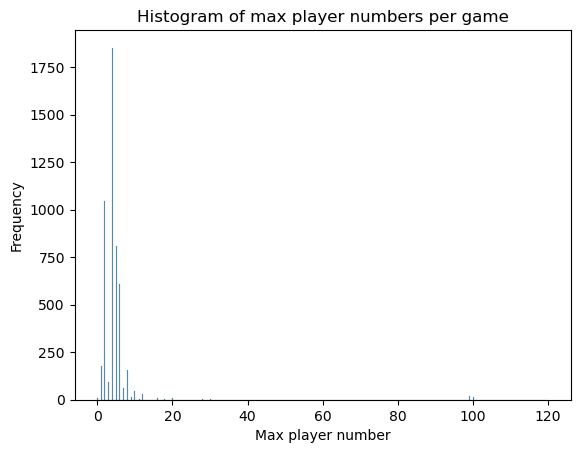

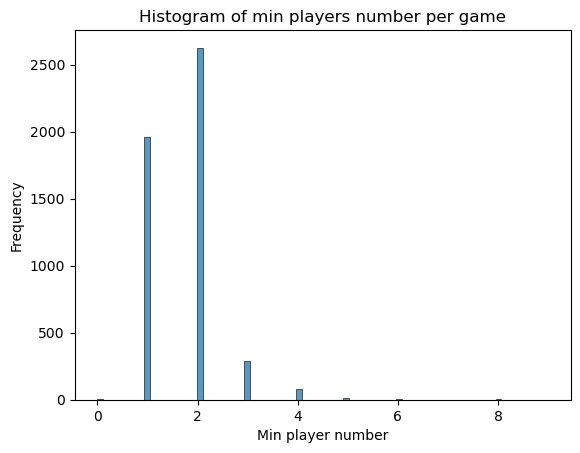

In [94]:
# Viewing the distribution of max number of players per game
sns.histplot(filtered_df['max player number'])
plt.title('Histogram of max player numbers per game')
plt.xlabel("Max player number")
plt.ylabel("Frequency")
plt.show()

# Viewing the distribution of min number of players per game
sns.histplot(filtered_df['min player number'])
plt.title('Histogram of min players number per game')
plt.xlabel("Min player number")
plt.ylabel("Frequency")
plt.show()

In [95]:
# Sorting the max player number from highest to lowest
filtered_df.sort_values(by = 'max player number', ascending =False, inplace=True)

# Exploring the number of games with no max player number
print(f"Number of games with no max player number given: {filtered_df.loc[(filtered_df['max player number'] == 0), 'max player number'].count()}")

# Exploring the number of games with no min player number
print(f"Number of games with no min player number given: {filtered_df.loc[(filtered_df['max player number'] == 0), 'max player number'].count()}")

# Exploring the number of games with max player number more than 12 players
print(f"Number of games with more than 12 max player number given: {filtered_df.loc[(filtered_df['max player number'] > 12), 'max player number'].count()}")

# Exploring the number of games with max player number more than 99 players
print(f"Number of games with more than 99 max player number given: {filtered_df.loc[(filtered_df['max player number'] > 99), 'max player number'].count()}")

# Median max player number per game
print(f"Median max player number given: {filtered_df.loc[:,'max player number'].median()}")

# 95th percentile of max player number
max_player_number_95th = np.percentile(filtered_df.loc[:,'max player number'].values, 95)
print(f"95th Percentile of max player number: {max_player_number_95th}")  

# Count of games above 95th percentile of max player number
print(f"Count of games above 95th Percentile of max player number: {filtered_df.loc[(filtered_df['max player number'] >max_player_number_95th), 'max player number'].count()}")  

# Count of games above 95th percentile of max player number
print(f"Count of games in and below 95th Percentile of max player number: {filtered_df.loc[(filtered_df['max player number'] <=max_player_number_95th), 'max player number'].count()}")  

Number of games with no max player number given: 8
Number of games with no min player number given: 8
Number of games with more than 12 max player number given: 69
Number of games with more than 99 max player number given: 13
Median max player number given: 4.0
95th Percentile of max player number: 8.0
Count of games above 95th Percentile of max player number: 163
Count of games in and below 95th Percentile of max player number: 4818


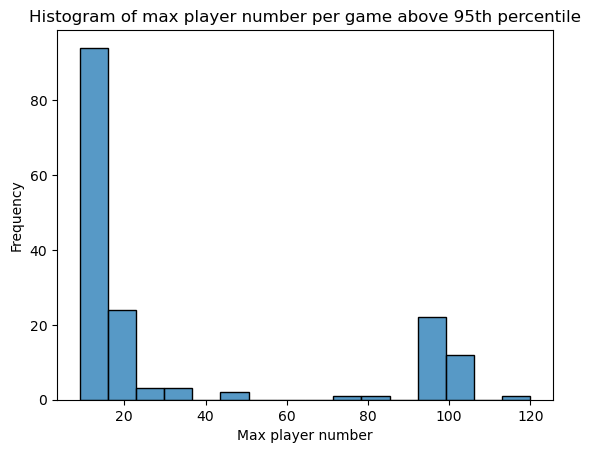

In [96]:
# Viewing the distribution of max number of players per game within the 95th percentile
sns.histplot(filtered_df.loc[filtered_df['max player number'] > max_player_number_95th,'max player number'])
plt.title('Histogram of max player number per game above 95th percentile')
plt.xlabel("Max player number")
plt.ylabel("Frequency")
plt.show()

In [97]:
# Identifying the games with 12 or more max player numbers
filtered_df.loc[filtered_df['max player number']>12,['id','name','min player number','max player number']]

,id,name,min player number,max player number
3848,60815,Black Powder: Second Edition,2,120
147,263918,Cartographers,1,100
2332,388329,Waypoints,1,100
2319,360471,Aquamarine,1,100
179,233867,Welcome To...,1,100
468,315767,Cartographers Heroes,1,100
4912,322045,Cartographers Heroes: Collector's Edition,1,100
4266,362121,Sunshine City,1,100
1411,350736,Voyages,1,100
3354,319604,Ricochet: A la poursuite du Comte courant,1,100


### Playtime

In [99]:
# Checking the top and lower 5 games in the filtered_df ordered by Max playtime
display(filtered_df.sort_values(by = 'max play time', ascending = False).head(5))
display(filtered_df.sort_values(by = 'max play time', ascending = False).tail(5))

,id,name,average,usersrated,number of comments,complexity votes,average complexity,year published,min player number,max player number,min play time,max play time,expected play time,minimum age limit,category,mechanism,game designer,publisher,url
1544,254,Empires in Arms,7.61112,1325,557,214,4.4019,1983,2,7,120,12000,12000,14,Economic // Political // Wargame // Napoleonic // Negotiation,Movement Points // Variable Player Powers // Area Movement // Scenario / Mission / Campaign Game // Simulation // Secret Unit Deployment // Dice Rolling // Variable Set-up,Greg Pinder // Harry Rowland,The Avalon Hill Game Co // Australian Design Group,https://boardgamegeek.com/xmlapi2/thing?id=254&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3126,22359,Steel Wolves: Germany's Submarine Campaign Against British & Allied Shipping – Vol 1 1939-43,7.69492,255,125,57,4.0175,2010,1,1,60,9000,9000,12,Nautical // World War II // Wargame,Movement Points // Solo / Solitaire Game // Simulation // Secret Unit Deployment // Point to Point Movement // Area-Impulse // Dice Rolling // Chit-Pull System,Stephen C. Jackson // Brien J. Miller,Spielworxx // Compass Games,https://boardgamegeek.com/xmlapi2/thing?id=22359&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3949,236650,1985: Under an Iron Sky,8.99068,118,81,15,4.2000,2018,2,6,120,8640,8640,16,Wargame // Modern Warfare,Movement Points // Simulation // Zone of Control // Hexagon Grid // Dice Rolling,Marco Cimmino // Fabrizio Vianello,Thin Red Line Games,https://boardgamegeek.com/xmlapi2/thing?id=236650&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3214,209511,Atlanta Is Ours,8.60793,164,80,12,3.6667,2018,1,2,60,7920,7920,0,Wargame // American Civil War,Movement Points // Scenario / Mission / Campaign Game // Simulation // Zone of Control // Hexagon Grid // Grid Movement // Dice Rolling,Chris Withers // Mike Belles // Ed Beach,Multi-Man Publishing,https://boardgamegeek.com/xmlapi2/thing?id=209511&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
2432,17484,Silent War,7.34623,619,353,125,3.3840,2005,1,2,60,7500,7500,12,Nautical // World War II // Wargame,Solo / Solitaire Game // Simulation // Secret Unit Deployment // Point to Point Movement // Dice Rolling // Chit-Pull System,Brien J. Miller,Compass Games,https://boardgamegeek.com/xmlapi2/thing?id=17484&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1


,id,name,average,usersrated,number of comments,complexity votes,average complexity,year published,min player number,max player number,min play time,max play time,expected play time,minimum age limit,category,mechanism,game designer,publisher,url
2803,17651,Under the Lily Banners,7.64494,324,166,55,3.6182,2005,1,2,0,0,0,12,Pike and Shot // Wargame,Dice Rolling // Hexagon Grid // Simulation,Ben Hull,GMT Games,https://boardgamegeek.com/xmlapi2/thing?id=17651&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3198,368036,Unlock!: Short Adventures – The Flight of the Angel,7.31818,269,65,7,1.8571,2022,1,6,0,0,0,0,Card Game // Real-time // Puzzle,Real-Time // Cooperative Game,NaN,Lord of Boards // Space Cowboys,https://boardgamegeek.com/xmlapi2/thing?id=368036&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3256,367820,Dungeons & Dragons: The Yawning Portal,7.26646,344,90,16,1.9375,2023,1,4,0,0,0,12,Fantasy,Race // Pattern Recognition // Matching // Increase Value of Unchosen Resources,Kristian Karlberg // Kenny Zetterberg,Avalon Hill // Wizards of the Coast // Hasbro,https://boardgamegeek.com/xmlapi2/thing?id=367820&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
4009,273655,Shadows of Brimstone: Gates of Valhalla,8.55752,113,67,1,3.0000,2023,1,4,0,0,0,0,Fighting // Miniatures // Adventure // Horror // Fantasy,Variable Player Powers // Cooperative Game // Modular Board // Grid Movement // Dice Rolling // Role Playing,Jason C. Hill,Flying Frog Productions,https://boardgamegeek.com/xmlapi2/thing?id=273655&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
2519,357746,Disney Sorcerer's Arena: Epic Alliances Core Set,7.52364,574,152,18,2.4444,2022,2,4,35,0,0,13,Fighting // Video Game Theme // Collectible Components,Command Cards // Hand Management // Area Movement // Deck Construction // Hexagon Grid // Grid Movement // Move Through Deck // Variable Set-up // Card Play Conflict Resolution,Sean Fletcher,The Op Games // Rebel Sp. z o.o.,https://boardgamegeek.com/xmlapi2/thing?id=357746&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1


In [100]:
# Sorting the max play time from highest to lowest
filtered_df.sort_values(by = 'max play time', ascending =False, inplace=True)

# Exploring the number of games with no max play time
print(f"Number of games with no max play time given: {filtered_df.loc[(filtered_df['max play time'] == 0), 'max play time'].count()}")

# Exploring the number of games with no min play time
print(f"Number of games with no min play time given: {filtered_df.loc[(filtered_df['min play time'] == 0), 'min play time'].count()}")  

# Exploring the number of games with no expected play time
print(f"Number of games with no expected play time given: {filtered_df.loc[(filtered_df['expected play time'] == 0), 'expected play time'].count()}\n")

# Checking if the games with zero values for expected play time are the same games as those with zero values for max play time
print(f"Are the games with zero expected play time and zero max play time the same?: {filtered_df.loc[filtered_df['expected play time'] ==0].equals( filtered_df.loc[filtered_df['max play time'] ==0])}")

# Exploring the number of games with no expected play time
print(f"Do games with expected play time and max play time have the same value?: {filtered_df['expected play time'].equals(filtered_df['max play time'])} \n")

# Exploring the number of games with max play time more than 120 minutes
print(f"Number of games with more than 120 minutes of max play time given: {filtered_df.loc[(filtered_df['max play time'] > 120), 'max play time'].count()}")

# Exploring the number of games with expected play time more than max play time
print(f"Number of games with expected play time more than max play time given: {filtered_df.loc[(filtered_df['expected play time']-filtered_df['max play time'])<0, 'max play time'].count()}")

# Median max play time per game
print(f"Median max play time given: {filtered_df.loc[:,'max play time'].median()}\n")

# 95th percentile of max play time
max_play_time_95th = np.percentile(filtered_df.loc[:,'max play time'].values, 95)
print(f"95th Percentile of max play time: {max_play_time_95th}")  

# Count of games above 95th percentile of max play time
print(f"Count of games above 95th Percentile of max play time: {filtered_df.loc[(filtered_df['max play time'] > max_play_time_95th), 'max play time'].count()}")  

# Count of games above 95th percentile of max play time
print(f"Count of games in and below 95th Percentile of max play time: {filtered_df.loc[(filtered_df['max play time'] <= max_play_time_95th), 'max play time'].count()}")  

Number of games with no max play time given: 27
Number of games with no min play time given: 20
Number of games with no expected play time given: 27

Are the games with zero expected play time and zero max play time the same?: True
Do games with expected play time and max play time have the same value?: True 

Number of games with more than 120 minutes of max play time given: 1146
Number of games with expected play time more than max play time given: 0
Median max play time given: 80.0

95th Percentile of max play time: 360.0
Count of games above 95th Percentile of max play time: 228
Count of games in and below 95th Percentile of max play time: 4753


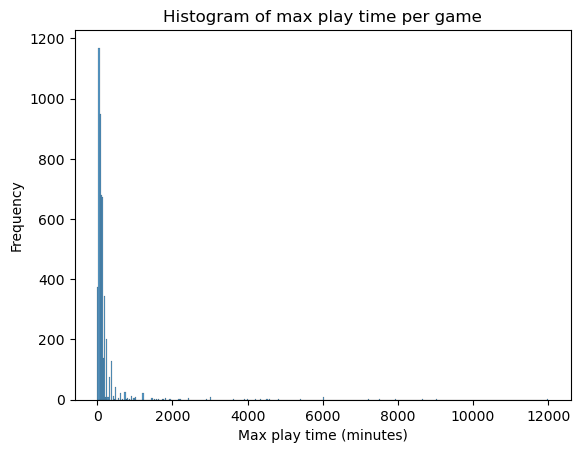

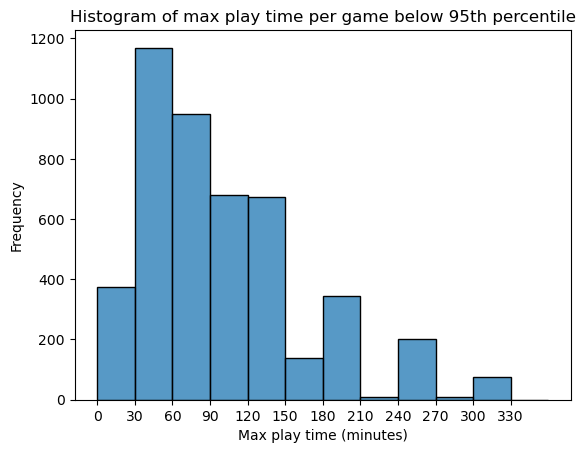

In [101]:
# Viewing the distribution of max play time per game
sns.histplot(filtered_df['max play time'], binwidth=30)
plt.title('Histogram of max play time per game')
plt.xlabel("Max play time (minutes)")
plt.ylabel("Frequency")
plt.show()

# Viewing the distribution of max play time per game below the 95th percentile
sns.histplot(filtered_df.loc[filtered_df['max play time']<max_play_time_95th,'max play time'], binrange=(0,max_play_time_95th),binwidth = 30)
plt.title('Histogram of max play time per game below 95th percentile')
plt.xlabel("Max play time (minutes)")
plt.ylabel("Frequency")
plt.xticks(np.arange(0,max_play_time_95th,30))
plt.show()

In [102]:
# Viewing all the games with zero min, max and expected playtime
filtered_df.loc[(filtered_df['max play time']==0)|(filtered_df['min play time']==0)|(filtered_df['expected play time']==0),['id','name','min play time','max play time','expected play time']]

,id,name,min play time,max play time,expected play time
1027,313889,Hoplomachus: Victorum,0,90,90
2534,347900,Tin Helm,0,30,30
3791,394961,Penny Black,0,20,20
4607,353289,Sherlock Aquelarre: El Mercader,60,0,0
1212,296108,Terraforming Mars: The Dice Game,45,0,0
1222,1540,BattleTech,0,0,0
3042,249750,"Brazen Chariots: Battles for Tobruk, 1941",0,0,0
4248,310726,"Iron Curtain: Central Europe, 1945-1989",0,0,0
4053,238181,Kamigami Battles: Battle of the Nine Realms,45,0,0
3739,173574,1836Jr,180,0,0


### Minimum age

In [104]:
# Checking the top and lower 5 games in the filtered_df ordered by minimum age limit
display(filtered_df.sort_values(by = 'minimum age limit', ascending = False).head(5))
display(filtered_df.sort_values(by = 'minimum age limit', ascending = False).tail(5))

,id,name,average,usersrated,number of comments,complexity votes,average complexity,year published,min player number,max player number,min play time,max play time,expected play time,minimum age limit,category,mechanism,game designer,publisher,url
3280,341027,Heroes of Barcadia,7.55822,307,106,6,1.6667,2022,2,6,30,90,90,21,Fantasy // Humor // Mature / Adult // Party Game,Dice Rolling // Tile Placement,Madison O'Neil,Rollacrit,https://boardgamegeek.com/xmlapi2/thing?id=341027&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
2826,358246,Dead by Daylight: The Board Game,7.20873,516,125,22,2.1818,2023,3,5,30,60,60,18,Horror // Video Game Theme // Exploration,Dice Rolling // Variable Player Powers // Team-Based Game // Simultaneous Action Selection,"D. Brad Talton, Jr.",Portal Games // Matagot // Bumble3ee Interactive // Level 99 Games // TLAMA games,https://boardgamegeek.com/xmlapi2/thing?id=358246&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
4968,369103,Dead by Daylight: The Board Game – Collector's Edition,8.14395,185,45,3,2.6667,2023,3,5,30,60,60,18,Horror // Video Game Theme // Exploration,Dice Rolling // Variable Player Powers // Team-Based Game // Simultaneous Action Selection,"D. Brad Talton, Jr.",Matagot // Level 99 Games // Yayoi The Dreamer,https://boardgamegeek.com/xmlapi2/thing?id=369103&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3998,183836,Ferox,7.69413,126,54,7,2.1429,2015,2,2,60,90,90,18,Horror // Fighting // Card Game // Adventure,"Variable Player Powers // Hand Management // Deck, Bag, and Pool Building // Take That // Area Majority / Influence // Dice Rolling // Open Drafting",Ryan Sheffield,Craft Fair Games,https://boardgamegeek.com/xmlapi2/thing?id=183836&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3408,69851,Aliens: This Time It's War,7.54484,213,122,24,1.8333,2010,2,2,45,45,45,18,Print & Play // Card Game // Horror // Movies / TV / Radio theme // Mature / Adult // Fighting // Science Fiction,Hand Management // Card Play Conflict Resolution,Mark Chaplin,(Self-Published),https://boardgamegeek.com/xmlapi2/thing?id=69851&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1


,id,name,average,usersrated,number of comments,complexity votes,average complexity,year published,min player number,max player number,min play time,max play time,expected play time,minimum age limit,category,mechanism,game designer,publisher,url
2933,193238,Tunisia II,8.42009,224,109,15,4.2667,2016,1,2,120,3000,3000,0,World War II // Wargame,Dice Rolling // Hexagon Grid // Zone of Control // Simulation,Dean Essig // John Kisner,Multi-Man Publishing,https://boardgamegeek.com/xmlapi2/thing?id=193238&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
4382,237551,The War of the Worlds: England,7.28223,121,57,18,2.3889,2018,1,1,60,60,60,0,Novel-based // Science Fiction // Wargame,Area Majority / Influence // Solo / Solitaire Game,Arnauld Della Siega,Dan Verssen Games (DVG),https://boardgamegeek.com/xmlapi2/thing?id=237551&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
1892,173105,The Great War,7.73647,812,333,53,2.6792,2015,2,2,60,60,60,0,World War I // Miniatures // Wargame,Campaign / Battle Card Driven // Hexagon Grid // Dice Rolling // Simulation,Richard Borg,Maldito Games // PSC Games // Nuts! Publishing,https://boardgamegeek.com/xmlapi2/thing?id=173105&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
1464,38718,Normandy '44,7.90993,1096,436,124,3.3710,2010,2,3,420,420,420,0,World War II // Wargame,Simulation // Zone of Control // Hexagon Grid // Ratio / Combat Results Table // Dice Rolling,Mark Simonitch,GMT Games,https://boardgamegeek.com/xmlapi2/thing?id=38718&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3927,34098,Guelphs and Ghibellines,7.83277,119,66,23,2.6522,2009,2,2,120,480,480,0,Medieval // Wargame,Dice Rolling // Hexagon Grid // Simulation,Piergennaro Federico,Europa Simulazioni,https://boardgamegeek.com/xmlapi2/thing?id=34098&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1


In [105]:
# Exploring the number of games with no minimum age limit
print(f"Number of games with no minimum age limit given: {filtered_df.loc[(filtered_df['minimum age limit'] == 0), 'minimum age limit'].count()}")


# Exploring the highest value of minimum age limit
print(f"The highest value of the minimum age limit given: {filtered_df['minimum age limit'].max()}")

Number of games with no minimum age limit given: 254
The highest value of the minimum age limit given: 21


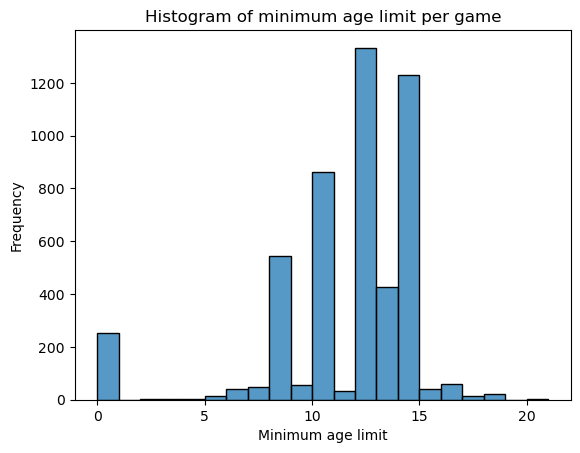

In [106]:
# Viewing the distribution of minimum age limit per game
sns.histplot(filtered_df['minimum age limit'],binwidth = 1)
plt.title('Histogram of minimum age limit per game')
plt.xlabel("Minimum age limit")
plt.ylabel("Frequency")
plt.show()

### Category

In [108]:
# Viewing a sample of the game categories as shown in the filtered_df
filtered_df[['id','name','category']].head(5)

,id,name,category
1544,254,Empires in Arms,Economic // Political // Wargame // Napoleonic // Negotiation
3126,22359,Steel Wolves: Germany's Submarine Campaign Against British & Allied Shipping – Vol 1 1939-43,Nautical // World War II // Wargame
3949,236650,1985: Under an Iron Sky,Wargame // Modern Warfare
3214,209511,Atlanta Is Ours,Wargame // American Civil War
2432,17484,Silent War,Nautical // World War II // Wargame


In [109]:
# Checking the frequency of each unique category
count_words(filtered_df,'category')

,Word,Count,Percentage
0,Wargame,822,5.62
1,Card Game,575,3.93
2,Economic,560,3.83
3,Fantasy,560,3.83
4,Miniatures,402,2.75
...,...,...,...
286,Expansion for Base-game,1,0.01
287,Arabian,1,0.01
288,Economic,1,0.01
289,Comic Book / Strip,1,0.01


In [110]:
# Checking games with null value in category field
filtered_df.loc[filtered_df['category'].isna()]

,id,name,average,usersrated,number of comments,complexity votes,average complexity,year published,min player number,max player number,min play time,max play time,expected play time,minimum age limit,category,mechanism,game designer,publisher,url
4550,379699,Dungeons & Dragons: Bedlam in Neverwinter,7.36803,127,32,9,1.5556,2023,2,6,90,270,270,12,NaN,NaN,"George Feledichuk // David ""Duvey"" Rudow // Leo Taylor",Wizards of the Coast // Hasbro,https://boardgamegeek.com/xmlapi2/thing?id=379699&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
1993,298281,Exit: The Game + Puzzle – The Sacred Temple,7.34890,829,184,15,2.4667,2020,1,4,90,180,180,10,NaN,Cooperative Game,Inka Brand // Markus Brand // Juliane Voorgang,Piatnik // Dino Toys s. r. o. // Devir // KOSMOS // Spilbræt.dk // IELLO // Lautapelit.fi // Brädspel.se // 999 Games,https://boardgamegeek.com/xmlapi2/thing?id=298281&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
4972,373597,The Witcher: Old World – Big Box,8.52555,137,26,4,3.2500,2023,1,5,90,150,150,14,NaN,NaN,Łukasz Woźniak,CD Projekt RED // Geekach Games // Rebel Sp. z o.o. // Go On Board // ADC Blackfire Entertainment // GaGa Games,https://boardgamegeek.com/xmlapi2/thing?id=373597&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3094,329500,Unconscious Mind,7.98812,264,363,36,4.0278,2024,1,4,60,120,120,12,NaN,Melding and Splaying // Worker Placement // End Game Bonuses // Solo / Solitaire Game // Contracts // Programmed Movement // Rondel // Set Collection // Open Drafting // Tags,Jonny Pac // Laskas // Antonio Zax // Yoma,Mosaico Jogos // Regatul Jocurilor // Fantasia Games // Maldito Games // Gém Klub Kft. // Frosted Games // Lucky Duck Games // GaGa Games,https://boardgamegeek.com/xmlapi2/thing?id=329500&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
1019,242684,Reavers of Midgard,7.36632,2957,658,96,2.9167,2019,2,4,60,120,120,14,NaN,Follow // Worker Placement // Set Collection // Dice Rolling // Open Drafting,J.B. Howell,Grey Fox Games // Arrakis Games // Portal Games // Don't Panic Games // MeepleBR // Corax Games,https://boardgamegeek.com/xmlapi2/thing?id=242684&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
1221,334986,Daybreak,7.78449,1588,478,68,2.9118,2023,1,4,60,120,120,10,NaN,Variable Player Powers // Automatic Resource Growth // Cooperative Game // Simultaneous Action Selection // Hand Management,Matt Leacock // Matteo Menapace,Schmidt Spiele // CMYK,https://boardgamegeek.com/xmlapi2/thing?id=334986&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3496,335446,Maximum Apocalypse: Wasted Wilds,8.18795,161,72,4,2.5000,2023,1,4,45,90,90,13,NaN,NaN,Mike Gnade,Rock Manor Games // Grimspire // Bad Taste Games // Boom Boom Games,https://boardgamegeek.com/xmlapi2/thing?id=335446&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
2077,237145,Daimyo: Rebirth of the Empire,7.38584,810,207,42,3.1905,2021,1,4,60,90,90,14,NaN,Dice Rolling // Area Majority / Influence // Hand Management,Jérémy Ducret,Grimspire // Games Unplugged LLC // Across the Board // La Boîte de Jeu // CafeMoka Studio // Maldito Games,https://boardgamegeek.com/xmlapi2/thing?id=237145&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3585,368974,Vienna,7.41629,196,79,11,3.0000,2023,2,4,30,90,90,14,NaN,NaN,Stefan Feld,Queen Games,https://boardgamegeek.com/xmlapi2/thing?id=368974&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
2388,334829,Fall of the Mountain King,7.42109,574,231,25,3.6000,2022,1,5,60,90,90,13,NaN,Area Majority / Influence // Action Points // Closed Drafting,Adam E. Daulton,Galakta // Gen-X Games // Burnt Island Games // IELLO // Skellig Games,https://boardgamegeek.com/xmlapi2/thing?id=334829&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1


In [111]:
# Checking the categories for key words: 'expansion', 'version', 'edition' to identify any further non-base games to remove
display(df_keyword_search(filtered_df,'category','expansion')[['id','name','category']])
display(df_keyword_search(filtered_df,'category','version')[['id','name','category']])
display(df_keyword_search(filtered_df,'category','edition')[['id','name','category']])

,id,name,category
3260,219717,18USA,Economic // Expansion for Base-game // Trains
1691,169416,Pathfinder Adventure Card Game: Wrath of the Righteous – Base Set,Expansion for Base-game // Fighting // Card Game // Adventure // Fantasy
4357,39169,"Warhammer 40,000: Codex",Science Fiction // Expansion for Base-game // Miniatures // Wargame
550,15985,Blood Bowl: Living Rulebook,Expansion for Base-game // Fantasy // Collectible Components // Miniatures // Sports // Fighting
4174,237114,Cthulhu: The Horror in Dunwich,Horror // Expansion for Base-game
4734,13454,Playing With Pyramids,Abstract Strategy // Expansion for Base-game // Book
4530,238277,Kamigami Battles: River of Souls,Expansion for Base-game // Card Game // Mythology
3247,172969,Pixel Tactics 5,Expansion for Base-game // Fighting // Card Game // Fantasy // Video Game Theme
2068,234931,Star Wars: Destiny – Two-Player Game,Expansion for Base-game // Dice // Card Game // Movies / TV / Radio theme


,id,name,category


,id,name,category


### Mechanism

In [113]:
# Viewing a sample of the game mechanisms as shown in the filtered_df
filtered_df[['id','name','mechanism']].head(5)

,id,name,mechanism
1544,254,Empires in Arms,Movement Points // Variable Player Powers // Area Movement // Scenario / Mission / Campaign Game // Simulation // Secret Unit Deployment // Dice Rolling // Variable Set-up
3126,22359,Steel Wolves: Germany's Submarine Campaign Against British & Allied Shipping – Vol 1 1939-43,Movement Points // Solo / Solitaire Game // Simulation // Secret Unit Deployment // Point to Point Movement // Area-Impulse // Dice Rolling // Chit-Pull System
3949,236650,1985: Under an Iron Sky,Movement Points // Simulation // Zone of Control // Hexagon Grid // Dice Rolling
3214,209511,Atlanta Is Ours,Movement Points // Scenario / Mission / Campaign Game // Simulation // Zone of Control // Hexagon Grid // Grid Movement // Dice Rolling
2432,17484,Silent War,Solo / Solitaire Game // Simulation // Secret Unit Deployment // Point to Point Movement // Dice Rolling // Chit-Pull System


In [114]:
# Checking games with null value in mechanism field
filtered_df.loc[filtered_df['mechanism'].isna()]

,id,name,average,usersrated,number of comments,complexity votes,average complexity,year published,min player number,max player number,min play time,max play time,expected play time,minimum age limit,category,mechanism,game designer,publisher,url
4143,363242,Donnerschlag: Escape from Stalingrad,8.03836,114,59,9,2.8889,2022,2,2,300,480,480,14,World War II // Wargame,NaN,Pepito Sbazzeguti // Patrick Gebhardt,VUCA Simulations,https://boardgamegeek.com/xmlapi2/thing?id=363242&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
4550,379699,Dungeons & Dragons: Bedlam in Neverwinter,7.36803,127,32,9,1.5556,2023,2,6,90,270,270,12,NaN,NaN,"George Feledichuk // David ""Duvey"" Rudow // Leo Taylor",Wizards of the Coast // Hasbro,https://boardgamegeek.com/xmlapi2/thing?id=379699&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
4972,373597,The Witcher: Old World – Big Box,8.52555,137,26,4,3.2500,2023,1,5,90,150,150,14,NaN,NaN,Łukasz Woźniak,CD Projekt RED // Geekach Games // Rebel Sp. z o.o. // Go On Board // ADC Blackfire Entertainment // GaGa Games,https://boardgamegeek.com/xmlapi2/thing?id=373597&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3578,57141,"Codeword Cromwell: The German Invasion of England, 8 June 1940",7.99542,142,80,20,3.0000,2014,1,1,120,120,120,10,World War II // Dice // Adventure // Wargame,NaN,Daniel Hodges (I),(Self-Published) // Fifth Column Games,https://boardgamegeek.com/xmlapi2/thing?id=57141&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
4920,328413,Darwin's Journey: Collector's Edition,8.53547,1050,267,41,3.7805,2023,1,4,60,120,120,14,Travel // Exploration,NaN,Simone Luciani // Nestore Mangone,Korea Boardgames // 黑城堡桌游 Black Castle Games // CMON Global Limited // ThunderGryph Games,https://boardgamegeek.com/xmlapi2/thing?id=328413&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
4086,4485,Hotel Life,7.24750,140,74,6,2.5000,1989,3,4,120,120,120,10,Economic // Humor,NaN,Hermann Wieland // Urs Hostettler,Schweizer Hotelier-Verein // Fata Morgana Spiele,https://boardgamegeek.com/xmlapi2/thing?id=4485&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3496,335446,Maximum Apocalypse: Wasted Wilds,8.18795,161,72,4,2.5000,2023,1,4,45,90,90,13,NaN,NaN,Mike Gnade,Rock Manor Games // Grimspire // Bad Taste Games // Boom Boom Games,https://boardgamegeek.com/xmlapi2/thing?id=335446&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3329,353745,From the Moon,7.60063,240,110,17,3.3529,2024,1,4,90,90,90,14,Space Exploration // Science Fiction,NaN,Gilles Lasfargues // Johannes Goupy,La Boîte de Jeu,https://boardgamegeek.com/xmlapi2/thing?id=353745&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3647,19765,Deduce or Die,7.14120,209,118,20,3.1000,2003,3,6,90,90,90,9,Card Game // Print & Play // Deduction,NaN,Larry Levy,(Web published),https://boardgamegeek.com/xmlapi2/thing?id=19765&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3762,384136,Star Trek: Away Missions,7.57849,170,54,10,2.2000,2023,2,2,60,90,90,14,Miniatures,NaN,Andrew Haught // Phil Yates // Mike Haught,"Gale Force Nine, LLC",https://boardgamegeek.com/xmlapi2/thing?id=384136&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1


In [115]:
# Checking the frequency of each unique mechanism
count_words(filtered_df,'mechanism')

,Word,Count,Percentage
0,Solo / Solitaire Game,779,3.09
1,Hand Management,770,3.06
2,Dice Rolling,670,2.66
3,Variable Player Powers,653,2.59
4,Dice Rolling,644,2.56
...,...,...,...
510,Race,1,0.00
511,Singing,1,0.00
512,Deck Construction,1,0.00
513,Order Counters,1,0.00


### Game Designer

In [117]:
# Viewing a sample of the game designers as shown in the filtered_df
filtered_df[['id','name','game designer']].head(5)

,id,name,game designer
1544,254,Empires in Arms,Greg Pinder // Harry Rowland
3126,22359,Steel Wolves: Germany's Submarine Campaign Against British & Allied Shipping – Vol 1 1939-43,Stephen C. Jackson // Brien J. Miller
3949,236650,1985: Under an Iron Sky,Marco Cimmino // Fabrizio Vianello
3214,209511,Atlanta Is Ours,Chris Withers // Mike Belles // Ed Beach
2432,17484,Silent War,Brien J. Miller


In [118]:
# Checking games with null value in game designer field
filtered_df.loc[filtered_df['game designer'].isna()]

,id,name,average,usersrated,number of comments,complexity votes,average complexity,year published,min player number,max player number,min play time,max play time,expected play time,minimum age limit,category,mechanism,game designer,publisher,url
4066,304983,Key Enigma: Hack Forward,8.04872,108,26,3,3.0000,2021,1,6,480,960,960,14,Science Fiction // Murder/Mystery // Puzzle,Storytelling // Cooperative Game // Deduction // Solo / Solitaire Game,NaN,(Self-Published) // Key Enigma,https://boardgamegeek.com/xmlapi2/thing?id=304983&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
4075,286925,Detective Stories: Case 3 – Still Lake,7.51395,129,26,5,2.0000,2019,1,6,90,270,270,13,Murder/Mystery // Deduction // Puzzle,Cooperative Game // Deduction,NaN,iDventure // Origames,https://boardgamegeek.com/xmlapi2/thing?id=286925&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3880,386136,"Warhammer 40,000 (Tenth Edition)",7.69262,126,35,6,4.5000,2023,2,6,60,240,240,12,Science Fiction // Miniatures // Wargame,Variable Player Powers // Scenario / Mission / Campaign Game // Measurement Movement,NaN,Games Workshop Ltd.,https://boardgamegeek.com/xmlapi2/thing?id=386136&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
2874,314243,"Warhammer 40,000 (Ninth Edition)",7.39644,352,73,16,4.3125,2020,2,6,120,240,240,12,Science Fiction // Miniatures // Wargame,Variable Player Powers // Scenario / Mission / Campaign Game // Measurement Movement,NaN,Hobby World // Games Workshop Ltd.,https://boardgamegeek.com/xmlapi2/thing?id=314243&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3854,332606,Hidden Games Tatort: Ein Drahtseilakt,7.76785,130,26,7,2.0000,2021,1,6,90,180,180,14,Murder/Mystery // Deduction,Scenario / Mission / Campaign Game // Cooperative Game // Deduction,NaN,Hidden Industries GmbH // MS Edizioni,https://boardgamegeek.com/xmlapi2/thing?id=332606&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
3083,316795,Legends of Void,7.79256,269,103,31,4.0323,2022,1,4,90,180,180,14,Economic // Fantasy // Territory Building // Environmental,Movement Points // Multiple Maps // Hand Management // End Game Bonuses // Solo / Solitaire Game // Set Collection // Sudden Death Ending // Take That // Hexagon Grid // Tile Placement // Grid Movement // Open Drafting // Variable Set-up // Income,NaN,Twoid Games,https://boardgamegeek.com/xmlapi2/thing?id=316795&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
2619,229427,"Warhammer 40,000 (Eighth Edition)",7.42102,458,98,18,3.5556,2017,2,12,120,180,180,12,Science Fiction // Miniatures // Wargame,Dice Rolling // Variable Player Powers // Action Points // Point to Point Movement,NaN,Games Workshop Ltd.,https://boardgamegeek.com/xmlapi2/thing?id=229427&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
4845,259435,Middle-earth Strategy Battle Game: The Lord of the Rings – Battle of Pelennor Fields,8.52578,128,27,4,4.2500,2018,2,2,90,180,180,12,Novel-based // Miniatures // Wargame // Movies / TV / Radio theme // Fantasy,Dice Rolling // Variable Player Powers // Action Points // Point to Point Movement,NaN,Games Workshop Ltd.,https://boardgamegeek.com/xmlapi2/thing?id=259435&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
2886,332075,Warhammer Quest: Cursed City,7.25180,523,164,23,2.4348,2021,1,4,120,180,180,12,Fighting // Miniatures // Adventure // Horror // Fantasy // Exploration,Variable Player Powers // Cooperative Game // Action Points // Square Grid // Modular Board // Grid Movement // Dice Rolling // Role Playing,NaN,Games Workshop Ltd.,https://boardgamegeek.com/xmlapi2/thing?id=332075&type=boardgame&versions=1&stats=1&marketplace=1&ratingcomments=1
2960,324157,Hidden Games Crime Scene: Green Poison,8.09088,228,40,11,2.1818,2020,1,6,90,180,180,14,Murder/Mystery // Deduction,Scenario / Mission / Campaign Game // Cooperative Game // Deduction,NaN,Hidden Industries GmbH // ToyRock Oy,https://boardg

In [119]:
# Checking the frequency of each unique game designer
count_words(filtered_df,'game designer')

,Word,Count,Percentage
0,,72,0.94
1,Reiner Knizia,47,0.61
2,Dean Essig,34,0.44
3,Inka Brand,33,0.43
4,(Uncredited),32,0.42
...,...,...,...
3942,Warny Marçano,1,0.01
3943,Joe Vargas,1,0.01
3944,Alex Tune,1,0.01
3945,Josh Lamont,1,0.01


### Publisher

In [121]:
# Viewing a sample of the publishers as shown in the filtered_df
filtered_df[['id','name','publisher']].head(5)

,id,name,publisher
1544,254,Empires in Arms,The Avalon Hill Game Co // Australian Design Group
3126,22359,Steel Wolves: Germany's Submarine Campaign Against British & Allied Shipping – Vol 1 1939-43,Spielworxx // Compass Games
3949,236650,1985: Under an Iron Sky,Thin Red Line Games
3214,209511,Atlanta Is Ours,Multi-Man Publishing
2432,17484,Silent War,Compass Games


In [122]:
# Checking the frequency of each unique publisher
count_words(filtered_df,'publisher')

,Word,Count,Percentage
0,Korea Boardgames,252,1.25
1,Rebel Sp. z o.o.,232,1.15
2,Galápagos Jogos,224,1.11
3,Devir,216,1.07
4,Hobby Japan,213,1.05
...,...,...,...
3840,Daedalus,1,0.00
3841,uchibacoya,1,0.00
3842,Underdog Games (II),1,0.00
3843,Giochi Rari,1,0.00
